# Week 6 - Bivariate Analysis, part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import files
from datetime import datetime, timedelta

In [2]:
upload = files.upload()

Saving BETH.csv to BETH.csv


In [3]:
beth = pd.read_csv('BETH.csv')

pd.set_option('display.max_columns', None)

beth.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],1,0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906698]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0


In [4]:
beth.describe()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus,evil
count,763144.000000,763144.000000,763144.000000,763144.000000,763144.000000,7.631440e+05,763144.000000,763144.000000,763144.000000,763144.000000,763144.0
mean,1844.582673,6814.763308,6820.265241,1882.216609,2.279034,4.026532e+09,288.158953,2.672082,17.520924,0.001663,0.0
std,1136.638249,1948.871187,1937.068333,2215.563094,37.416576,1.649030e+02,385.117778,1.340906,318.596662,0.040744,0.0
min,132.560721,1.000000,1.000000,0.000000,0.000000,4.026532e+09,3.000000,0.000000,-115.000000,0.000000,0.0
25%,903.250802,7313.000000,7313.000000,187.000000,0.000000,4.026532e+09,3.000000,1.000000,0.000000,0.000000,0.0
50%,1829.203642,7365.000000,7365.000000,1385.000000,0.000000,4.026532e+09,62.000000,3.000000,0.000000,0.000000,0.0
75%,2761.380825,7415.000000,7415.000000,1648.000000,0.000000,4.026532e+09,257.000000,4.000000,4.000000,0.000000,0.0
max,3954.587643,8619.000000,8619.000000,7672.000000,1000.000000,4.026532e+09,1010.000000,5.000000,8289.000000,1.000000,0.0


In [5]:
descriptions = {
    'Timestamp' : 'Seconds since the system booted when the log entry was created.',
    'Process ID' : 'ID of process that generated this log entry.',
    'Thread ID' : 'ID of thread that generated this log entry.',
    'Parent Process ID' : 'ID of Parent Process from which the current process originated.',
    'User ID' : 'User ID of person who initiated the process.',
    'mountNamespace' : 'ID of mount namespace (which restricts the file system access for the process).',
    'processName' : 'Name of the process that executed and generated this log entry.',
    'hostName' : 'Host server where the process and event occurred.',
    'eventId' : 'ID of event that triggered this log entry.',
    'eventName' : 'Name of event.',
    'stackAddresses' : 'Memory addresses from the call stack associated with the logged event.',
    'argsNum' : 'Number of arguments passed to the process generating this log entry.',
    'returnValue' : 'Return value of the process execution recorded in the log.',
    'args' : 'A list of arguments provided to the process at the time of execution.',
    'sus' : 'Indicates whether the logged event is suspiciousness or not.',
    'evil' : 'A label representing the potential maliciousness of the event recorded in the log.'
}

descriptions

# Numeric cols = Timestamp, argsNum, returnValue, sus

{'Timestamp': 'Seconds since the system booted when the log entry was created.',
 'Process ID': 'ID of process that generated this log entry.',
 'Thread ID': 'ID of thread that generated this log entry.',
 'Parent Process ID': 'ID of Parent Process from which the current process originated.',
 'User ID': 'User ID of person who initiated the process.',
 'mountNamespace': 'ID of mount namespace (which restricts the file system access for the process).',
 'processName': 'Name of the process that executed and generated this log entry.',
 'hostName': 'Host server where the process and event occurred.',
 'eventId': 'ID of event that triggered this log entry.',
 'eventName': 'Name of event.',
 'stackAddresses': 'Memory addresses from the call stack associated with the logged event.',
 'argsNum': 'Number of arguments passed to the process generating this log entry.',
 'returnValue': 'Return value of the process execution recorded in the log.',
 'args': 'A list of arguments provided to the proc

In [6]:
beth.value_counts()

,,,,,,,,,,,,,,,,count
timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil,
3954.587643,1,1,0,0,4026531840,systemd,ip-10-100-1-120,3,close,[],1,0,"[{'name': 'fd', 'type': 'int', 'value': 39}]",0,0,1
132.560721,187,187,1,0,4026532217,systemd-udevd,ubuntu,257,openat,"[139692889304747, 28558051270274934]",4,-2,"[{'name': 'dirfd', 'type': 'int', 'value': -100}, {'name': 'pathname', 'type': 'const char*', 'value': '/run/udev/queue'}, {'name': 'flags', 'type': 'unsigned int', 'value': 'O_RDONLY|O_NOFOLLOW|O_CLOEXEC|O_PATH'}, {'name': 'mode', 'type': 'mode_t', 'value': 3372969643}]",0,0,1
132.560761,187,187,1,0,4026532217,systemd-udevd,ubuntu,1005,security_file_open,[],4,0,"[{'name': 'pathname', 'type': 'const char*', 'value': '/run/udev/queue'}, {'name': 'flags', 'type': 'unsigned int', 'value': 'O_WRONLY|O_CREAT|O_EXCL|O_LARGEFILE'}, {'name': 'dev', 'type': 'dev_t', 'value': 25}, {'name': 'inode', 'type': 'unsigned long', 'value': 469}]",0,0,1
132.560814,187,187,1,0,4026532217,systemd-udevd,ubuntu,257,openat,[],4,14,"[{'name': 'dirfd', 'type': 'int', 'value': -100}, {'name': 'pathname', 'type': 'const char*', 'value': '/run/udev/queue'}, {'name': 'flags', 'type': 'unsigned int', 'value': 'O_WRONLY|O_CREAT|O_EXCL|O_CLOEXEC'}, {'name': 'mode', 'type': 'mode_t', 'value': 3372969643}]",0,0,1
132.560838,187,187,1,0,4026532217,systemd-udevd,ubuntu,5,fstat,[139692889302665],2,0,"[{'name': 'fd', 'type': 'int', 'value': 14}, {'name': 'statbuf', 'type': 'struct stat*', 'value': '0x7FFDE8C233B0'}]",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132.561760,187,187,1,0,4026532217,systemd-udevd,ubuntu,4,stat,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', 'value': '/usr/lib/systemd/hwdb/hwdb.bin'}, {'name': 'statbuf', 'type': 'struct stat*', 'value': '0x7FFDE8C23360'}]",0,0,1
132.561736,187,187,1,0,4026532217,systemd-udevd,ubuntu,4,stat,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', 'value': '/etc/udev/hwdb.bin'}, {'name': 'statbuf', 'type': 'struct stat*', 'value': '0x7FFDE8C23360'}]",0,0,1
132.561712,187,187,1,0,4026532217,systemd-udevd,ubuntu,4,stat,"[139692889302570, 94285822595744]",2,-2,"[{'name': 'pathname', 'type': 'const char*', 'value': '/etc/systemd/hwdb/hwdb.bin'}, {'name': 'statbuf', 'type': 'struct stat*', 'value': '0x7FFDE8C23360'}]",0,0,1


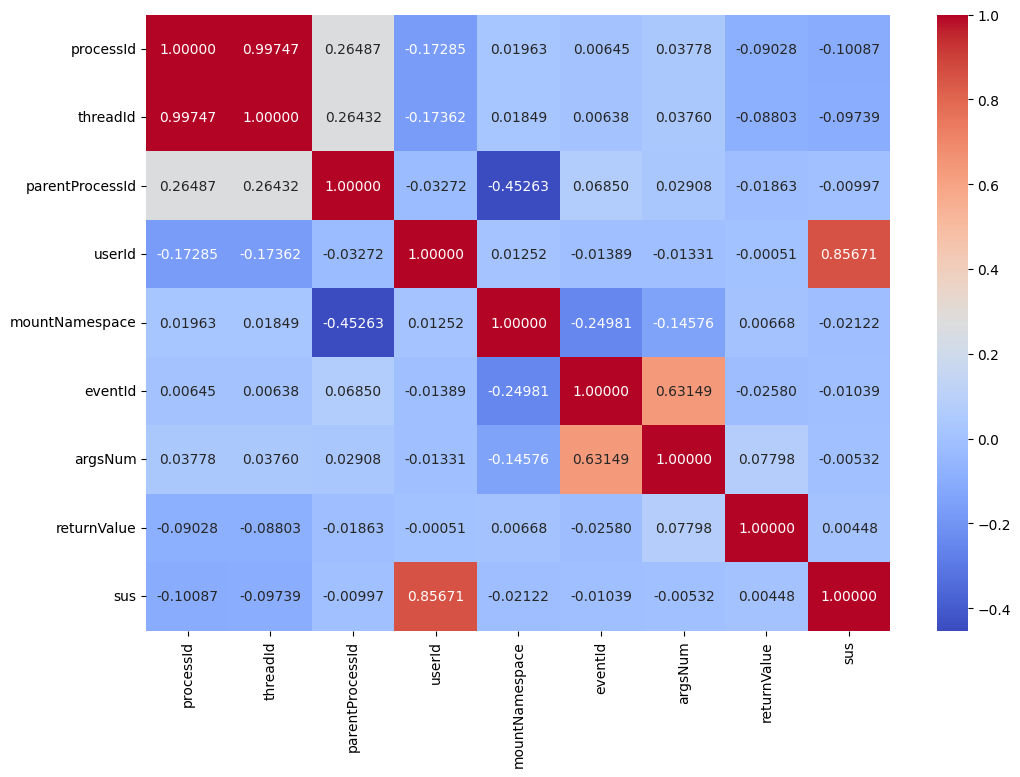

In [7]:

test = beth[['processId',	'threadId',	'parentProcessId',	'userId',	'mountNamespace',	'eventId',	'argsNum', 'returnValue', 'sus']]

most_cat = test.corr()

plt.figure(figsize=(12,8))
sns.heatmap(most_cat, cmap='coolwarm', annot=True, fmt='.5f')
plt.show()

In [8]:
# Filter out correlations above abs(0.4)

filtered_corr = most_cat[(abs(most_cat) >= 0.4) & (abs(most_cat) < 1.0)]
filtered_corr

,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
processId,NaN,0.997469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
threadId,0.997469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parentProcessId,NaN,NaN,NaN,NaN,-0.452629,NaN,NaN,NaN,NaN
userId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.856705
mountNamespace,NaN,NaN,-0.452629,NaN,NaN,NaN,NaN,NaN,NaN
eventId,NaN,NaN,NaN,NaN,NaN,NaN,0.631485,NaN,NaN
argsNum,NaN,NaN,NaN,NaN,NaN,0.631485,NaN,NaN,NaN
returnValue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sus,NaN,NaN,NaN,0.856705,NaN,NaN,NaN,NaN,NaN


In [9]:
beth['sus'].value_counts()

,count
sus,
0,761875
1,1269


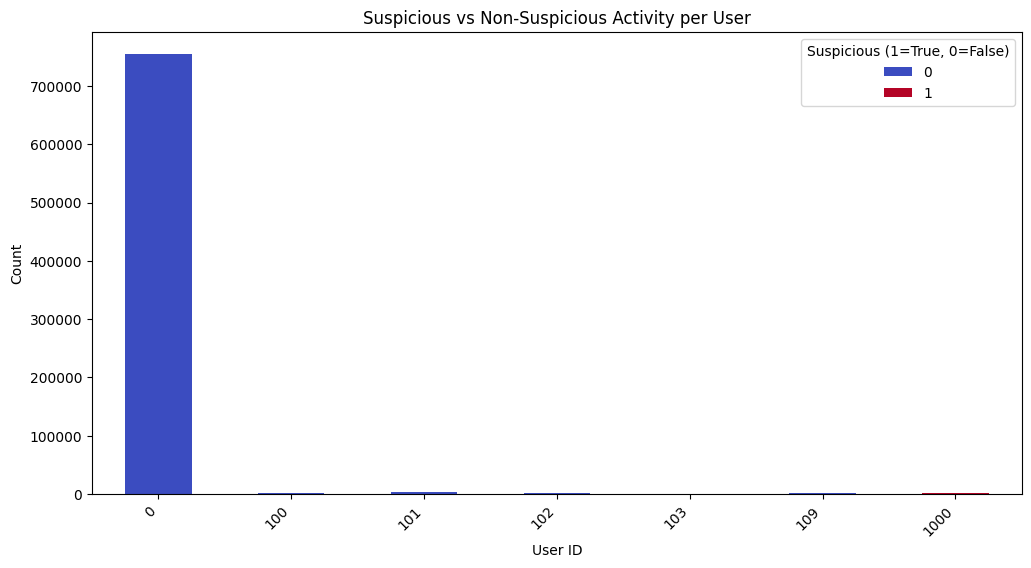

In [10]:
# Aggregate data
summary = beth.groupby(['userId', 'sus']).size().unstack(fill_value=0)

# Plot
ax = summary.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

# Adjust x-ticks to prevent clutter
plt.xticks(rotation=45, ha="right")  # Rotate user IDs slightly

# Labels and title
plt.xlabel('User ID')
plt.ylabel('Count')
plt.title('Suspicious vs Non-Suspicious Activity per User')
plt.legend(title="Suspicious (1=True, 0=False)")

# Show plot
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


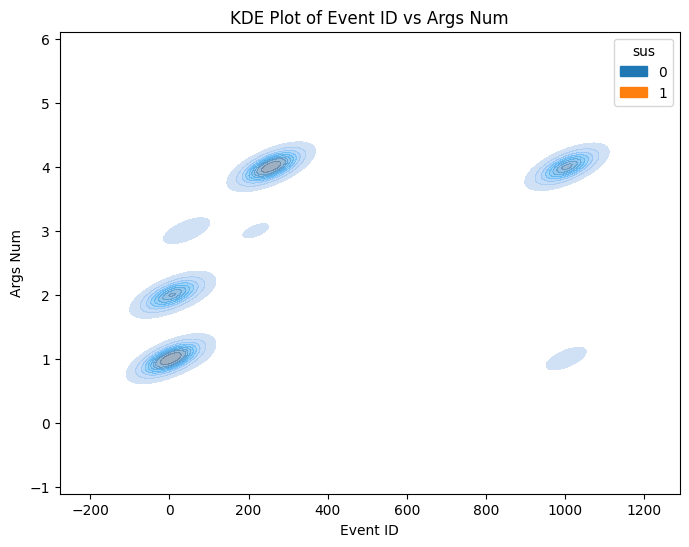

In [11]:
# processID and threadID
# parentProcessID and mountNamespace
# eventID and argsNum

# KDE Plot

plt.figure(figsize=(8,6))

sns.kdeplot(x=beth['eventId'], y=beth['argsNum'], hue=beth['sus'], fill=True, cmap="coolwarm", alpha=0.5)

plt.xlabel('Event ID')
plt.ylabel('Args Num')
plt.title('KDE Plot of Event ID vs Args Num')
plt.show()


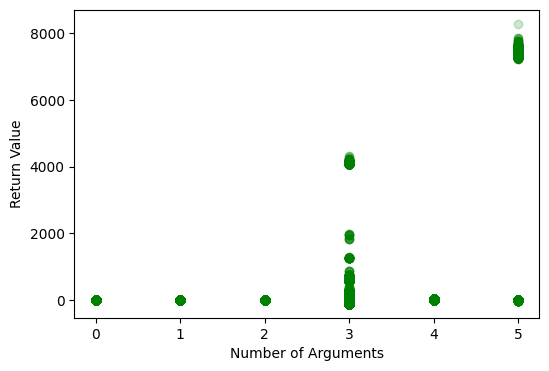

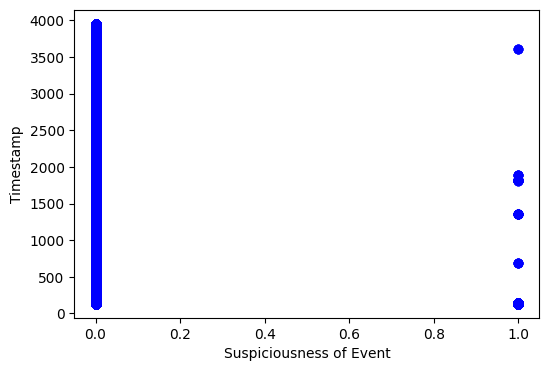

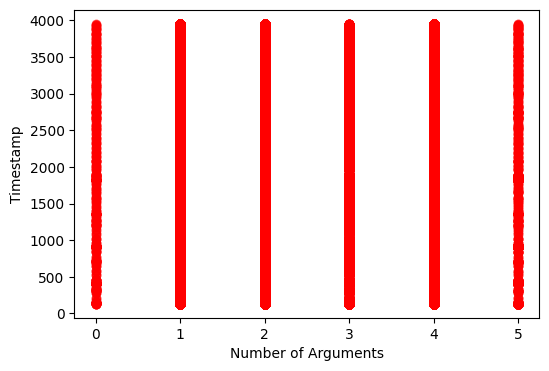

In [12]:
# Scatter Plot of Number of Arguments vs. Return Value

plt.figure(figsize=(6,4))
plt.scatter(beth['argsNum'], beth['returnValue'], color='green', alpha=0.2)
plt.xlabel('Number of Arguments')
plt.ylabel('Return Value')
plt.show()

# Scatter Plot of Number of Arguments vs. Return Value

plt.figure(figsize=(6,4))
plt.scatter( beth['sus'], beth['timestamp'], color='blue', alpha=0.2)
plt.xlabel('Suspiciousness of Event')
plt.ylabel('Timestamp')
plt.show()

# Scatter Plot of Number of Arguments vs. Return Value

plt.figure(figsize=(6,4))
plt.scatter(beth['argsNum'], beth['timestamp'], color='red', alpha=0.2)
plt.xlabel('Number of Arguments')
plt.ylabel('Timestamp')
plt.show()
